In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Inflation Rates Dataset

https://www.kaggle.com/federalreserve/interest-rates/downloads/interest-rates.zip/1

In [2]:
inflation_rates = pd.read_csv('../sample_data/index.csv')

# Exploring the data

In [3]:
#preview the dataframe we're working with
inflation_rates.head(5)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [4]:
#check for data types and null values
inflation_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
Year                            904 non-null int64
Month                           904 non-null int64
Day                             904 non-null int64
Federal Funds Target Rate       462 non-null float64
Federal Funds Upper Target      103 non-null float64
Federal Funds Lower Target      103 non-null float64
Effective Federal Funds Rate    752 non-null float64
Real GDP (Percent Change)       250 non-null float64
Unemployment Rate               752 non-null float64
Inflation Rate                  710 non-null float64
dtypes: float64(7), int64(3)
memory usage: 70.7 KB


In [5]:
inflation_rates['DATE'] = inflation_rates['Year'].astype(str) + '-' + inflation_rates['Month'].astype(str) + '-' + inflation_rates['Day'].astype(str)
inflation_rates.head(5)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,DATE
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN,1954-7-1
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN,1954-8-1
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN,1954-9-1
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN,1954-10-1
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN,1954-11-1


In [6]:
inflation_rates['DATE'].max()

'2017-3-16'

In [7]:
inflation_rates['Year'].unique()

array([1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

# Scatterplot

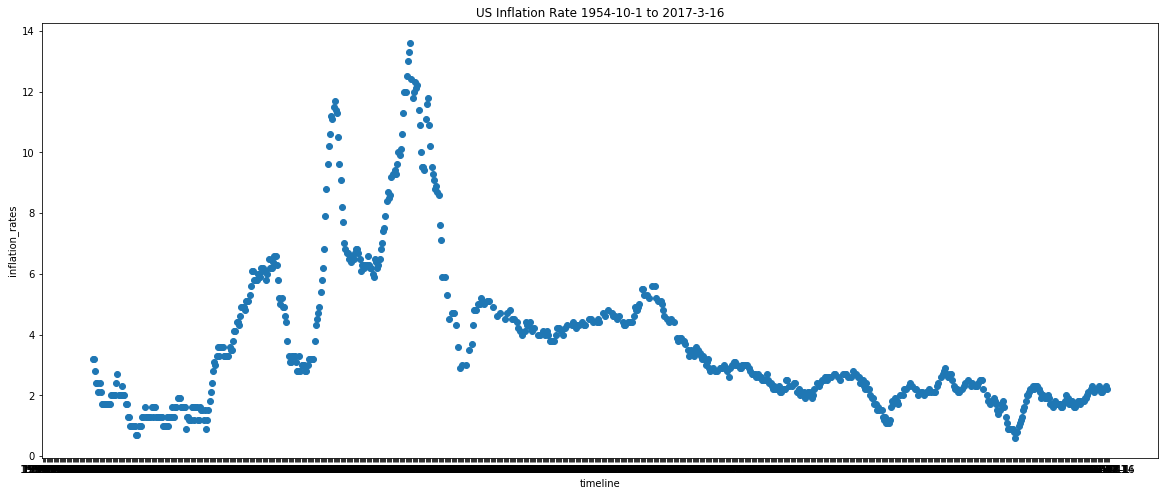

In [8]:
plt.figure(figsize=(20,8))
plt.scatter(x=inflation_rates['DATE'], y=inflation_rates['Inflation Rate'])
plt.ylabel('inflation_rates')
plt.xlabel('timeline')
plt.title('US Inflation Rate {} to {}'.format(inflation_rates['DATE'].min(), inflation_rates['DATE'].max()));

This scatterplot represents the different inflation rates in the US over time, between 1954 and 2017.  It shows a downward trend for the majority of the timeline, with the maximum rate peaking close to 14%.  There are a few "mini" peaks, and we need to check if dates correspond to financial crisis in the US (ie. early and mid 1980's, 1990, 2000, and 2007) 

# Historgam

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


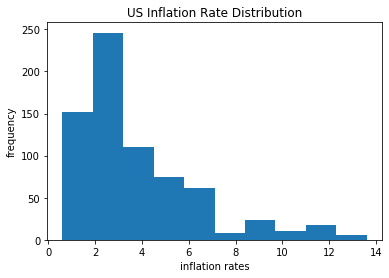

In [10]:
plt.hist(inflation_rates['Inflation Rate'], bins=10)
plt.title('US Inflation Rate Distribution')
plt.xlabel('inflation rates')
plt.ylabel('frequency');

From this spread, it is comforting to know that +7% rates are not the most common.  It looks like a gamma distribution.  

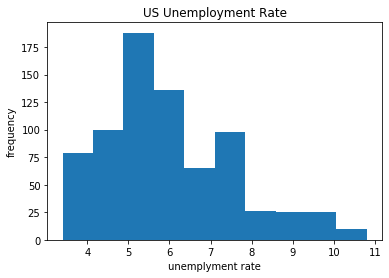

In [11]:
plt.hist(inflation_rates['Unemployment Rate'], bins=10)
plt.title('US Unemployment Rate')
# x_ticks = np.linspace(mortgage_rates['delta'].min(),mortgage_rates['delta'].max(),10)
# plt.xticks(x_ticks)
plt.xlabel('unemplyment rate')
plt.ylabel('frequency');

Looks like another gamma distribution.

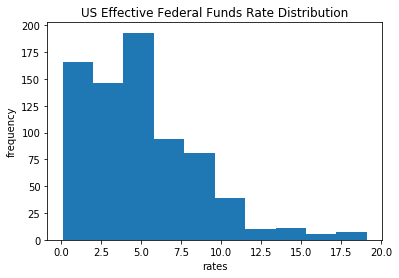

In [12]:
plt.hist(inflation_rates['Effective Federal Funds Rate'], bins=10)
plt.title('US Effective Federal Funds Rate Distribution')
plt.xlabel('rates')
plt.ylabel('frequency');

In [13]:
inflation_rates['Effective Federal Funds Rate'].max()

19.1

# Barplot

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


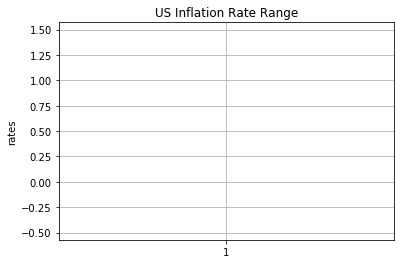

In [14]:
plt.boxplot(inflation_rates['Inflation Rate'])
plt.title('US Inflation Rate Range')
plt.ylabel('rates')
plt.grid();

In [15]:
mean = inflation_rates['Inflation Rate'].mean()
median = inflation_rates['Inflation Rate'].median()
rate_min = inflation_rates['Inflation Rate'].min()
rate_max = inflation_rates['Inflation Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 3.733380281690133
median: 2.8
min: 0.6
max: 13.6


The mean and median values are skewed by the large collection of outliers.  Outliers start at ~16%.  It is interesting that the current rate <4% is in the bottom quartile.  If looking at rates alone, it is a good time to buy!  

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


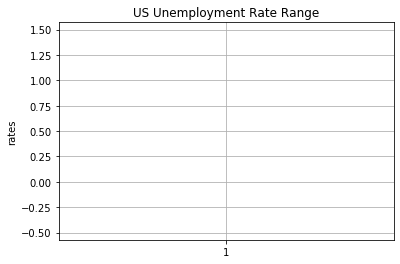

In [16]:
plt.boxplot(inflation_rates['Unemployment Rate'])
plt.title('US Unemployment Rate Range')
plt.ylabel('rates')
plt.grid();

In [17]:
mean = inflation_rates['Unemployment Rate'].mean()
median = inflation_rates['Unemployment Rate'].median()
rate_min = inflation_rates['Unemployment Rate'].min()
rate_max = inflation_rates['Unemployment Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 5.979122340425527
median: 5.7
min: 3.4
max: 10.8


/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


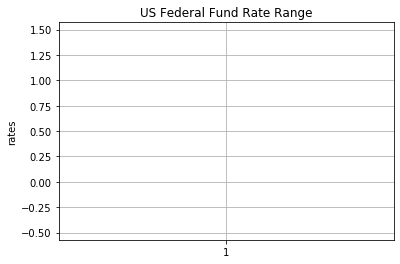

In [19]:
plt.boxplot(inflation_rates['Effective Federal Funds Rate'])
plt.title('US Federal Fund Rate Range')
plt.ylabel('rates')
plt.grid();

In [20]:
mean = inflation_rates['Effective Federal Funds Rate'].mean()
median = inflation_rates['Effective Federal Funds Rate'].median()
rate_min = inflation_rates['Effective Federal Funds Rate'].min()
rate_max = inflation_rates['Effective Federal Funds Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 4.910997340425531
median: 4.7
min: 0.07
max: 19.1


# Summary of Histogram Plots

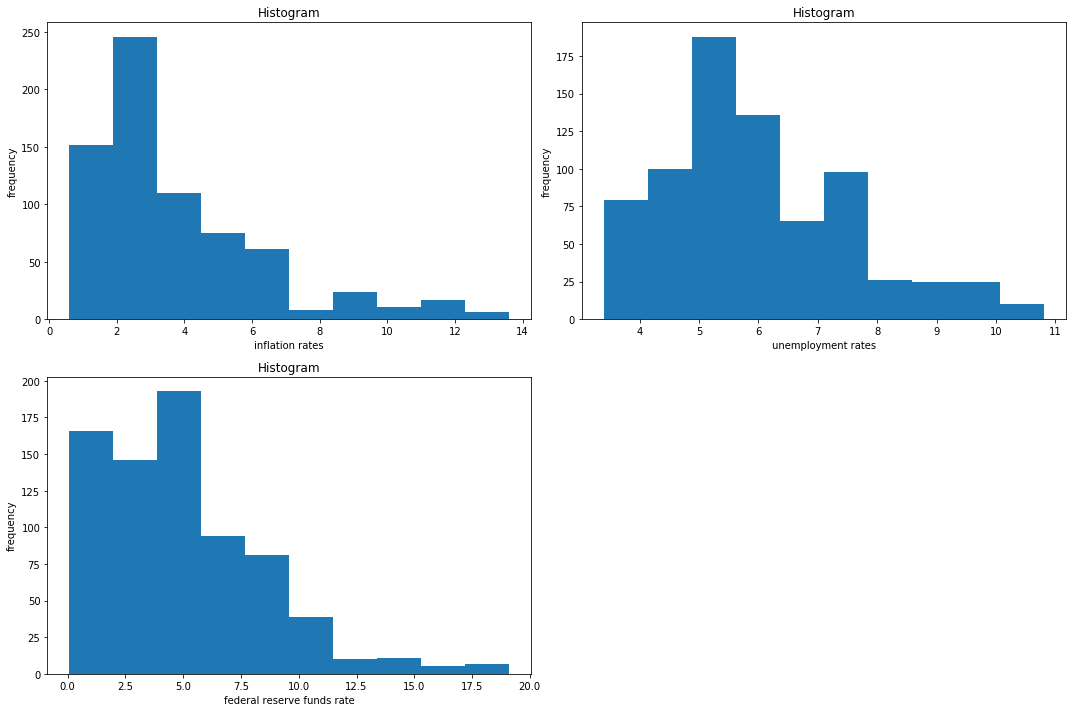

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(inflation_rates['Inflation Rate'])
plt.title('Histogram')
plt.xlabel('inflation rates')
plt.ylabel('frequency')

plt.subplot(2,2,2)
plt.hist(inflation_rates['Unemployment Rate'])
plt.title('Histogram')
plt.xlabel('unemployment rates')
plt.ylabel('frequency')

plt.subplot(2,2,3)
plt.hist(inflation_rates['Effective Federal Funds Rate'])
plt.title('Histogram')
plt.xlabel('federal reserve funds rate')
plt.ylabel('frequency')

plt.tight_layout();